# **MissionData**

## Description

The `MissionData` class offers a convenient solution for retrieving mission-specific altimeter data from [copernicus](https://www.copernicus.eu/en) within a specified time range and geographical coordinates for individual satellites. The class supports retreiving data for the following satellites; e1, e1g, e2, tp, tpn, g2, j1, j1n, j1g, j2, j2n, j2g, j3, j3n, en, enn, c2, c2n, al, alg, h2a, h2ag, h2b, h2c, s3a, s3b, s6a-hr, and s6a-lr. Presently, it is tailored specifically for the [European Seas Along Track L3 Sea Surface Heights Reprocessed 1993 Ongoing Tailored For Data Assimilation product](https://data.marine.copernicus.eu/product/SEALEVEL_EUR_PHY_L3_MY_008_061/services) offered by Copernicus. 




This class is built for the following directory structure:

- root_folder:
    - cmems_obs-sl_eur_phy-ssh_my_[**MISSION NAME HERE**]-l3-duacs_PT1S:
        - year j:
            - month 01
                - file 1
                - file 2
                - ...
            - month 02
            - ...
            - month 12
        - year j+1:
            - ...
    - ...

Note: the class includes longitude processing to convert the values from a range of [0, 360] to [-180, 180].




## Arguments

* `root_folder (str)` : The path of the root folder where the mission specific data directories are located. (e.g '/Users/user1/UCL/thesis/data/raw').

* `mission_name (str)` : The name of the desired mission. Note that the provided mission name must be in: e1, e1g, e2, tp, tpn, g2, j1, j1n, j1g, j2, j2n, j2g, j3, j3n, en, enn, c2, c2n, al, alg, h2a, h2ag, h2b, h2c, s3a, s3b, s6a-hr, and s6a-lr. (e.g 'al')

* `year (List[str])` : Year(s) of desired observation(s). (e.g ['2012'] for 2012 observations)

* `month (List[str])` : Month(s) of desired observation(s). (e.g ['01', '12'] for January and December 
observations)

* `latitude_range (Tuple[float, float])` : Tuple of latitude range of observations, (e.g (0, 90) for upper hemisphere).

* `longitude_range (Tuple[float, float])` : Tuple of longitude range of observations, (e.g (0, 180) for eastern half of planet).


## Demo


Loading data for mission: 'al'
> 2013-04 | completed


Text(0, 0.5, 'Latitude')

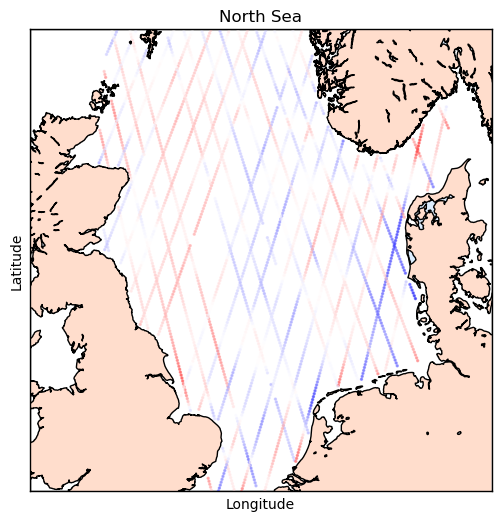

In [17]:
# Dataloaders import
from dataloaders import MissionData

# plotting imports
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# arguments
my_root_folder = '/Users/maxnorman/UCL/thesis/data/raw'
my_mission_name = 'al'
my_years = ['2013']
my_months = ['04']
my_latitude_range = (51, 61)
my_longitude_range = (-3, 10)

# create mission data object
al_2013_03 = MissionData(
                        root_folder = my_root_folder, 
                        mission_name = my_mission_name, 
                        years = my_years, 
                        months = my_months,
                        latitude_range = my_latitude_range,
                        longitude_range = my_longitude_range
                        )

# extract data
al_2013_03_long = al_2013_03.mission_data.longitude.values
al_2013_03_lat = al_2013_03.mission_data.latitude.values
al_2013_03_sla = al_2013_03.mission_data.sla_filtered.values

# create north sea figure
fig = plt.figure(figsize=(6, 6))
m = Basemap(projection='gnom', resolution='h', width=1.E6, height=1.E6, lat_0=56, lon_0=3,)
m.drawcoastlines()
m.drawmapboundary(fill_color="#FFFFFF")
m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')

# map (long, lat) to (x, y) for plotting
x, y = m(al_2013_03_long, al_2013_03_lat)  # Convert coordinates to Basemap projection

# plot data
m.scatter(x, y, c=al_2013_03_sla, cmap='seismic', alpha=0.5, s = 2, vmin=-0.5, vmax=0.5)

# labels
plt.title('North Sea')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

